# Clusters
 
La clusterización es generar diferentes grupos de datos de forma tal que en cada grupo predomine una característica común y que esta difiera de los otros grupos. Esta es una técnica de **aprendizaje no supervisado** dado que, en principio, no sabemos qué datos pertenecen a cada grupo, y en muchos casos, ni siquiera sabemos cuántos grupos son. 

Los modelos de aprendizaje no-supervisado tienen los mismos pasos que el aprendizaje supervisado que vimos hasta este momento salvo por dos cuestiones: no se realiza la división de datos ni la evaluación.

**No se realiza la división de los datos**, ya que no tenemos una variable a predecir **y** por lo cual no es necesario realizar esa división, tampoco se realiza la división en entrenamiento y testo porque no hay una predicción "correcta", sino solamente formas de organizar los datos.

Existen formas de **evaluar** un modelo de aprendizaje no-supervisado pero no es con datos de testeo sino es con métricas propias de cada uno de los modelos

Por lo tanto los pasos que realizaremos son:
1. Definición del Problema
2. Búsqueda de datos 
3. Exploración y Limpieza de Datos
4. Entrenamiento del modelo


##### Problema y Búsqueda de datos

Uno de los usos más comunes de aprendizaje no-supervisado es la segmentación de clientes. En este caso vamos a utilizar un Dataset sobre Clientes de un Shopping para ver como podríamos realizar la segmentación.

Vamos a utilizar un Dataset de [Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv)
Con los mismo datos entrenaremos dos tipos de modelos distintos:
- K-means (con distntos hiperárametros)
- Aglomeración Jerarquica 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Mall_Customers.csv")

##### Exploración y Limpieza del dataset

In [3]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Modificamos los nombres de las columnas

data.columns =["id", "genero", "edad", "ingreso", "gasto"]

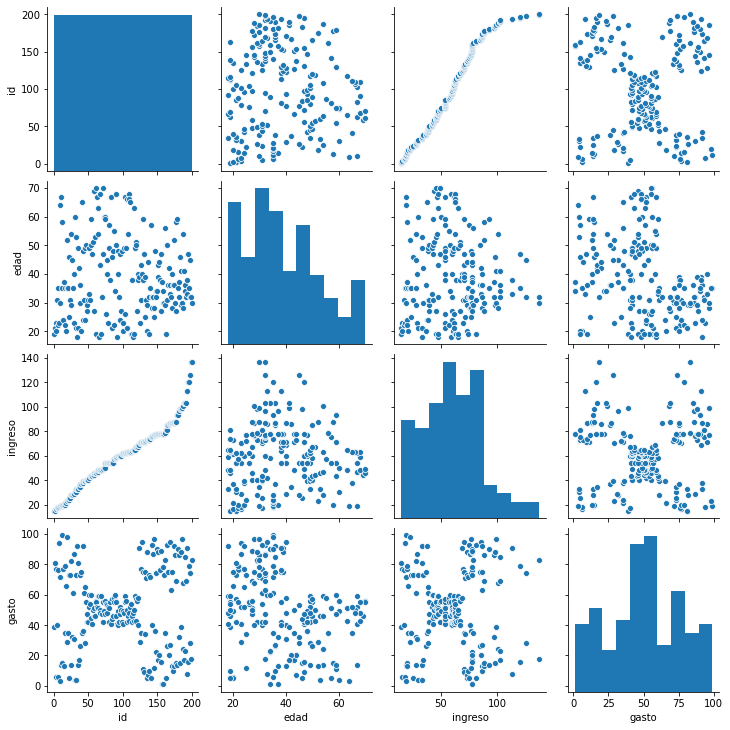

In [6]:
# Visualizamos la relación entre las variables

sns.pairplot(data)

## Promedio-k (K-means)

Esta es una de las técnicas más comunes y mas usadas, es un proceso iterativo en el cual se fijan la cantidad de cluster que se quieren generar y se crea el centroide (punto centro del cluster) de cada cluster en lugares aleatorios,  luego en cada iteración se toma la distancia de cada punto a su centroide más cercano, para cada cluster se computa el promedio de las distancias y se se actualiza el centroide con esa nueva posición, todo esto hasta, para cada cluster no cambién los integrantes del mismo o se cumplan un número fijo de iteraciones. 

En este caso lo primero que haremos será entrenar el modelo solamente utilizando las variables **ingreso** y **gastos** para poder visualizarlo.

In [7]:
# Vamos a utilizar como datos ingreso y gastos

data_clauster = data.drop(columns = ["id", "edad", "genero"])

In [8]:
data_clauster.head(3)

,ingreso,gasto
0,15,39
1,15,81
2,16,6


<AxesSubplot:xlabel='ingreso', ylabel='gasto'>

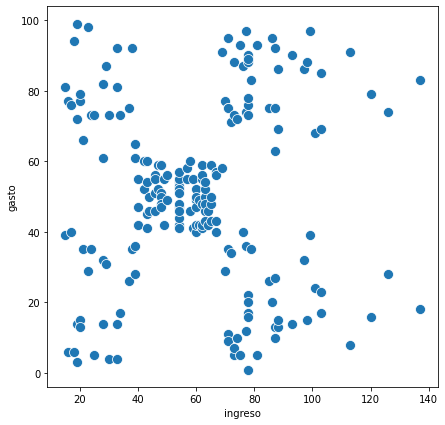

In [9]:
# Visualizamos los datos

plt.figure(figsize = (7,7))
sns.scatterplot(data = data_clauster, x = "ingreso", y = "gasto", s=100)

##### Entrenamiento del modelo

No se realiza la división de los datos, directamente se entrena el modelo que se utilizará. 

Al momento de instanciar el modelo que se utilizará es necesario definir los hiperarámetros, en este caso la cantidad de cluster que deseamos formar (la cantidad de grupos). Podemos ver las opciones a definir en la [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


In [10]:
# Importamos el modelo KMeans de la librería Scikit-Learn

from sklearn.cluster import KMeans

In [11]:
# Instanciamos el modelo definiendo los hiperparametros, en este caso 5: la cantidad de clausters que queremos buscar

kmeans = KMeans(n_clusters=5, random_state=0)

In [12]:
# Entrenamos el modelo con el método fit y TODOS los datos ya que no se realiza la división

kmeans.fit(data_clauster)

KMeans(n_clusters=5, random_state=0)

In [13]:
# Observamos las etiquetas creadas

kmeans.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

##### Resultado del modelo

Para poder observar mejor el resultado del modelo colocaremos las etiquetas obtenidas como una columna del Dataset. 

Veremos la distribución de los cluster creados y realizaremos una visualización de como quedo realizado el agrupamiento

In [14]:
# Incorporamos una columna nueva en el DataFrame con las etiquetas

data_clauster["cluster"] = kmeans.labels_

data_clauster.head(3)

,ingreso,gasto,cluster
0,15,39,3
1,15,81,1
2,16,6,3


In [15]:
# Obsevamos la cantidad de registos en cada clusters utilizando value_counts()

data_clauster["cluster"].value_counts()

0    81
2    39
4    35
3    23
1    22
Name: cluster, dtype: int64

<AxesSubplot:xlabel='ingreso', ylabel='gasto'>

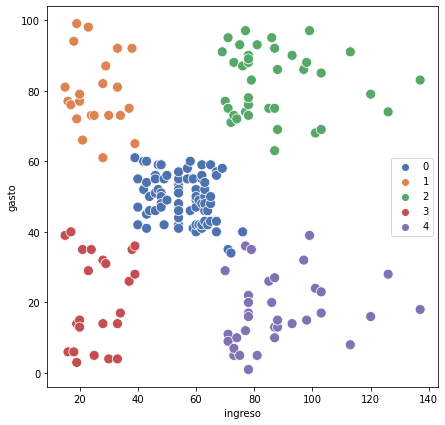

In [16]:
# Visualizamos

plt.figure(figsize = (7,7))
sns.scatterplot(data = data_clauster, x = "ingreso", y = "gasto", hue=data_clauster["cluster"].to_list(), palette="deep", s=100)


#### Segundo modelo cambiando la cantidad de cluster

Ahora entrenaremos otro modelo pero modificaremos el hiperparámetro n_cluster, es decir cambiaremos la cantidad de grupos que se buscaran.

In [17]:
# Vamos a probar si seleccionamos 3 K

data_3k = data.drop(columns = ["id", "edad", "genero"])

In [18]:
data_3k.head(3)

,ingreso,gasto
0,15,39
1,15,81
2,16,6


In [19]:
# Instanciamos el modelo definiendo los hiperparametros, en este caso 3 clausters

kmeans_3k = KMeans(n_clusters=3, random_state=0)

In [20]:
# Entrenamos el modelo

kmeans_3k.fit(data_3k)

KMeans(n_clusters=3, random_state=0)

In [21]:
# Observamos las etiquetas creadas

kmeans_3k.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

##### Resultado del modelo

Para poder observar mejor el resultado del modelo colocaremos las etiquetas obtenidas como una columna del Dataset. 

Veremos la distribución de los cluster creados y realizaremos una visualización de como quedo realizado el agrupamiento

In [22]:
# Incorporamos una columna nueva en el DataFrame con las etiquetas

data_3k["cluster"] = kmeans_3k.labels_

data_3k["cluster"]

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    2
197    1
198    2
199    1
Name: cluster, Length: 200, dtype: int32

In [23]:
# Obsevamos la cantidad de registos en cada clusters utilizando value_counts()

data_3k["cluster"].value_counts()

0    123
1     39
2     38
Name: cluster, dtype: int64

<AxesSubplot:xlabel='ingreso', ylabel='gasto'>

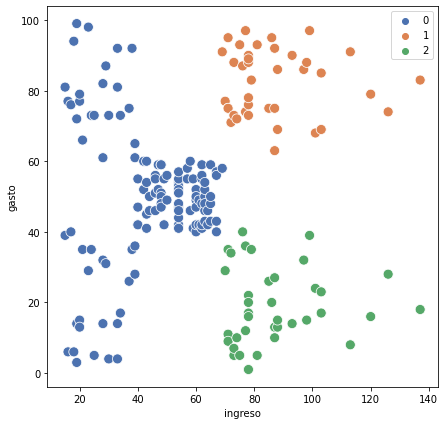

In [24]:
# Visualizamos

plt.figure(figsize = (7,7))
sns.scatterplot(data = data_3k, x = "ingreso", y = "gasto", hue=data_3k["cluster"].to_list(), palette="deep", s=100)


#### Entrenamiento del modelo con todas las variables 

Ahora generaremos el claustering utilizando también las variables **edad** y **género**. Al utilizar más variables ya no es posible realizar las visualizaciones.

Para poder utilizar la variable *género* primero es necesario convertirlo en variable dummy ya que es categórica

In [25]:
# Vamos a utilizar como datos edad, ingresos, género y gastos

data_completa = data.drop(columns = ["id"])

In [26]:
data_completa = pd.get_dummies(data_completa,  drop_first=True)


In [27]:
data_completa.head(3)

,edad,ingreso,gasto,genero_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0


In [28]:
# Instanciamos el modelo definiendo los hiperparametros, en este caso 5: la cantidad de clausters que queresmos buscar

kmeans = KMeans(n_clusters=5, random_state=0)

In [29]:
# Entrenamos el modelo

kmeans.fit(data_completa)

KMeans(n_clusters=5, random_state=0)

In [30]:
# Observamos las etiquetas creadas

kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

##### Resultado del modelo

Para poder observar mejor el resultado del modelo colocaremos las etiquetas obtenidas como una columna del Dataset. 

Veremos la distribución de los cluster creados.

In [31]:
# Incorporamos una columna nueva en el DataFrame con las etiquetas

data_completa["cluster"] = kmeans.labels_

data_completa.head(3)

,edad,ingreso,gasto,genero_Male,cluster
0,19,15,39,1,0
1,21,15,81,1,4
2,20,16,6,0,0


In [32]:
# Obsevamos la cantidad de registos en cada clusters utilizando value_counts()

data_completa["cluster"].value_counts()

1    79
2    39
3    36
4    23
0    23
Name: cluster, dtype: int64

## Aglomeración Jerárquica (Hierarchical Clustering)

Ahora utilizaremos el mismo Dataset de Clientes de un Shopping para realizar el agrupamiento pero utilizaremos otro método llamado Aglomeración jerárquica.

Este es un proceso iterativo, en el que en cada iteración, tomamos las distancias de todos los datos entre si, luego el par de puntos que se encuentren mas cerca se unen, de forma que ahora esos dos puntos forman un solo punto, y, su ubicación se obtiene de diferentes formas según el parámetro [linkage](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), esto se realiza hasta que solo quede un punto produciendo un dendograma, este se puede cortar a diferentes alturas para producir los clusters.

In [33]:
# Creamos un DataFrame con las columnas "ingreso" y "gasto" para realizar nuevamente la clauserización

data_aglomeracion = data.drop(columns = ["id", "edad", "genero"])

##### Entrenamiento del modelo

Al igual que antes, no se realiza la división de los datos, directamente se entrena el modelo que se utilizará. 

Al momento de instanciar el modelo que se utilizará es necesario definir los hiperarámetros, en este caso la *cantidad de cluster* que deseamos formar (la cantidad de grupos) y el tipo de *linkage*. Podemos ver las opciones a definir en la [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglomerativeclustering#sklearn.cluster.AgglomerativeClustering).

En este caso entrenaremos un modelo para realizar 5 cluster y se realizara utilizando el linkage "average", es decir, el promedio


In [34]:
# Importamos el modelo

from sklearn.cluster import AgglomerativeClustering

In [35]:
#Instanciamos el modelo y definimos los hiperparametros: la cantidad de clauster y el tipo de linkage

modelo_agg = AgglomerativeClustering(n_clusters=5, linkage = "average")

In [36]:
# Entrenamos el modelo
modelo_agg.fit(data_aglomeracion)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [37]:
# Vemos las etiquetas creadas

modelo_agg.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4,
       0, 4], dtype=int64)

##### Resultado del modelo

Para poder observar mejor el resultado del modelo colocaremos las etiquetas obtenidas como una columna del Dataset. 

Veremos la distribución de los cluster creados y realizaremos una visualización de como quedo realizado el agrupamiento

In [38]:
# Incorporamos una columna con las etiquetas
data_aglomeracion["cluster"] = modelo_agg.labels_

In [39]:
# Obsevamos la cantidad de registos en cada clusters utilizando value_counts()

data_aglomeracion["cluster"].value_counts()

1    102
0     38
2     36
3     21
4      3
Name: cluster, dtype: int64

<AxesSubplot:xlabel='ingreso', ylabel='gasto'>

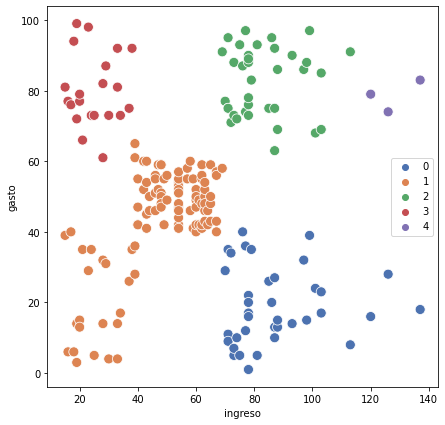

In [40]:
# Visualizamos

plt.figure(figsize = (7,7))
sns.scatterplot(data = data_aglomeracion, x = "ingreso", y = "gasto", hue=data_aglomeracion["cluster"].to_list(), palette="deep", s=100)


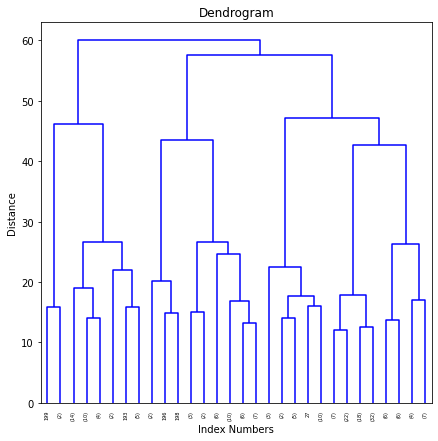

In [41]:
# Visualizamos el dendograma

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

Z = linkage(data_aglomeracion, 'average');

plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,  
    color_threshold=0,
    truncate_mode='lastp'
)
plt.show()

#### Segundo modelo cambiando la cantidad de cluster

Ahora entrenaremos otro modelo pero modificaremos el hiperparámetro linkage por "ward".

In [42]:
#Instanciamos el modelo y definimos los hiperparametros: la cantidad de clauster y el tipo de linkage

modelo_agg_ward = AgglomerativeClustering(n_clusters=5, linkage = "ward")

In [43]:
# Entrenamos el modelo
modelo_agg_ward.fit(data_aglomeracion)

AgglomerativeClustering(n_clusters=5)

In [44]:
# Vemos las etiquetas creadas

modelo_agg_ward.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

##### Resultado del modelo

Para poder observar mejor el resultado del modelo colocaremos las etiquetas obtenidas como una columna del Dataset. 

Veremos la distribución de los cluster creados y realizaremos una visualización de como quedo realizado el agrupamiento

In [45]:
# Incorporamos una columna con las etiquetas
data_aglomeracion["cluster_ward"] = modelo_agg_ward.labels_

In [46]:
# Obsevamos la cantidad de registos en cada clusters utilizando value_counts()

data_3k["cluster"].value_counts()

0    123
1     39
2     38
Name: cluster, dtype: int64

<AxesSubplot:xlabel='ingreso', ylabel='gasto'>

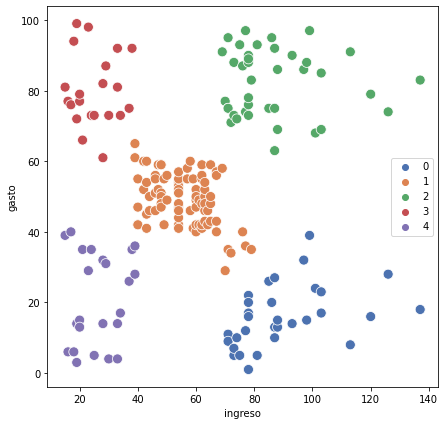

In [47]:
# Visualizamos

plt.figure(figsize = (7,7))
sns.scatterplot(data = data_aglomeracion, x = "ingreso", y = "gasto", hue=data_aglomeracion["cluster_ward"].to_list(), palette="deep", s=100)


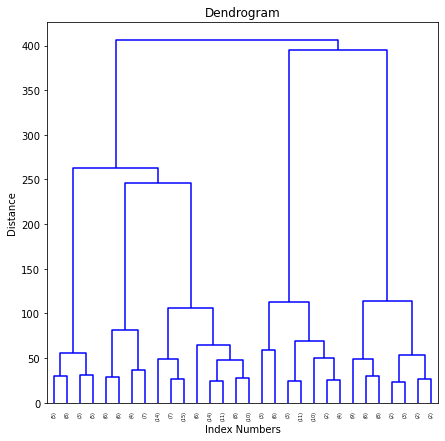

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

Z = linkage(data_aglomeracion, 'ward');

plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,  
    color_threshold=0,
    truncate_mode='lastp'
)
plt.show()

##### Conclusión

Podríamos volver a entrenar un modelo de Agrupamiento Jerárquico con todas las variables del dataset. También podemos entrenar distintos modelos de K-Means o de Agrupamiento Jerárquico cambiando los hiperparámetros para observar los resutlados obtenidos y compararlos.

Si bien no se realiza una evaluación con los datos de test, es posible evaluar el resultado del agrupamiento utilizando [Silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette#sklearn.metrics.silhouette_score)